# Upper Confidence Bound

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Loading

In [2]:
PATH = "../../../Reinforcement_Learning/Upper_Confidence_Bound_(UCB)/Python/Ads_CTR_Optimisation.csv"

In [3]:
dataset = pd.read_csv(PATH)

## UCB Algorithm

In [4]:
N = len(dataset)
ads = len(dataset.columns)
ads_selected = []
selections = [0] * ads
sum_of_rewards = [0] * ads
total_reward = 0

In [5]:
import math
for n in range(N):
    ad = 0
    max_UCB = 0
    for i in range(ads):
        if (selections[i] > 0):
            avg_reward = sum_of_rewards[i] / selections[i]
            delta = math.sqrt(3/2 * math.log(n + 1) / selections[i])
            UCB = avg_reward + delta
        else:
            selections[i] = 1
            UCB = 1e400
        if (UCB > max_UCB):
            max_UCB = UCB
            ad = i
    ads_selected.append(ad)
    selections[ad] += 1
    reward = dataset.values[n, ad]
    sum_of_rewards[ad] += reward 
    total_reward += reward

## Visualisation

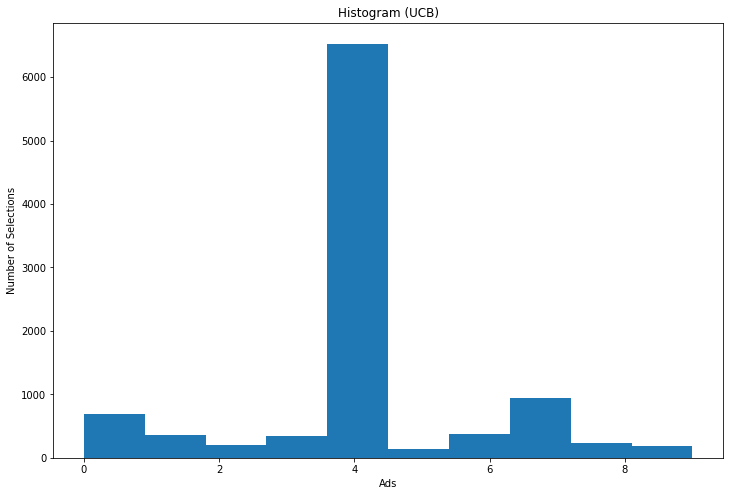

In [6]:
plt.figure(figsize=(12, 8))
plt.hist(ads_selected)
plt.title("Histogram (UCB)")
plt.xlabel("Ads")
plt.ylabel("Number of Selections")
plt.show()